In [1]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import imutils
import urllib
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files (x86)\\Tesseract-OCR\\tesseract.exe'
import numpy as np
from firebase import firebase  
from datetime import date
from datetime import datetime

In [2]:
num_cascade = cv2.CascadeClassifier("indian_license_plate.xml")
# cap = cv2.VideoCapture("ch03_20200604061256.mp4")

letters = [
            '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D',
            'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
            'U', 'V', 'W', 'X', 'Y', 'Z'
]

In [3]:
#     url = 'http://192.168.43.1:8080/shot.jpg'
#     img = urllib.request.urlopen(url)
#     imgnp = np.array(bytearray(img.read()),dtype=np.uint8)
#     imgg = cv2.imdecode(imgnp, -1)

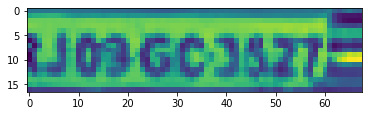

J02GC34772


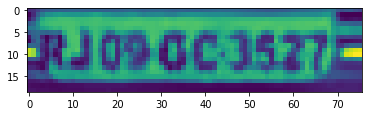

RJOGGCSZTH


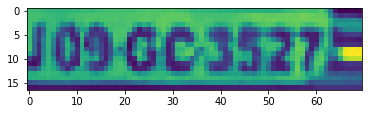

1090635727


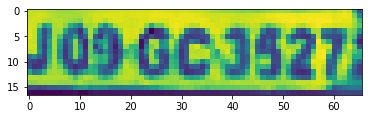

1090603527


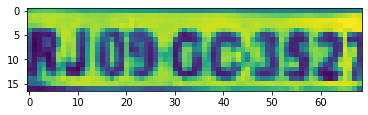

RJO0603521


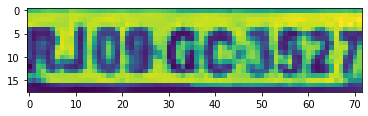

RJOGC31527


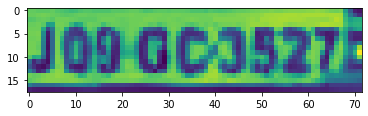

J090GC3527


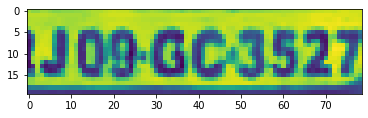

JO09GC3527


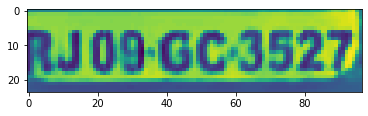

RJ09GC3527


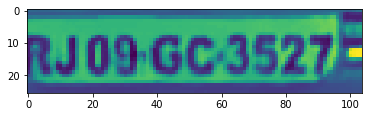

RJ09GC3527
['J02GC34772', 'RJOGGCSZTH', '1090635727', '1090603527', 'RJO0603521', 'RJOGC31527', 'J090GC3527', 'JO09GC3527', 'RJ09GC3527', 'RJ09GC3527']


In [4]:
#ch03_20200604061256.mp4
#10.15.8.72_31_20200618093813446.mp4
#10.15.8.72_31_20200618093853482.mp4 http:/admin:pass123@192.168.43.1/
##10.15.8.72_31_20200618093922526.mp4  ch03_20200604061216.mp4
npr=[]
while(True):
#     ret, frame = cap.read()
#     frame = imutils.resize(frame,width=1400)
    url = 'Provide Your camera feed here'
    img = urllib.request.urlopen(url)
    imgnp = np.array(bytearray(img.read()),dtype=np.uint8)
    frame = cv2.imdecode(imgnp, -1)

    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray,11,17,17)
    
    num=num_cascade.detectMultiScale(gray, 1.1, 4)
    idx = 69
    for (x, y, w, h) in num:
        if y>1:
            cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 2)
            new_img = gray[y:y+h,x:x+w]
            
            
            cv2.imwrite('Images/'+str(idx)+ '.png',new_img)
            cropped_img = cv2.imread("Images/69.png")
            #cropped_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)
            #cropped_img = cv2.bilateralFilter(cropped_img,11,17,17)
            cropped_img = imutils.resize(cropped_img, width=400)
            #himg,wimg,gimg = cropped_img.shape
            
            text = pytesseract.image_to_string(cropped_img, lang='eng')
            if len(text)>=10:
                
                iy = mpimg.imread("Images/69.png")
                
                #print(text)
                t=''
                for i in text:
                    if i in letters:
                        t=t+i
                if len(t)==10:
                    plt.imshow(iy)
                    plt.show()
                    print(t)
                    npr.append(t)
                
            break 
    cv2.imshow('frame',frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
print(npr)
cap.release( )
cv2.destroyAllWindows()

In [5]:
state=['RJ','AP','AR','AS','BR','CG','GA','GJ','HR','HP','JH','KA','KL','MP','MH','MN','ML','MZ','NL','OD','PB','SK','TN','TS','TR',
      'UP','UK','WB','AN','CH','DD','DL','JK','LA','LD','PY']
alphabets=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
dict = {'2':'Z','1':'J'}
numbers = ['1','2','3','4','5','6','7','8','9','0']


In [6]:
temp=[]
'''
for i in npr:
    x=i[:2]
    if x in state:
        temp.append(i) 

pemp=[]
for l in temp:
    x=l[5:6]
    y=l[6:7]
    if x in alphabets and y in alphabets:
        pemp.append(l)
print(pemp)'''
for i in npr:
    x=i[:2]
    if x in state:
        temp.append(i) 
#print(temp)
s=-1
pemp=[]
for l in temp:
    x=l[4:5]
    y=l[5:6]
    z=l[2:3]
    if x in alphabets and y in alphabets and z in numbers:
        pemp.append(l)

            
            
   
   
            
print(pemp)

['RJ09GC3527', 'RJ09GC3527']


In [7]:
npr=pemp
npr

['RJ09GC3527', 'RJ09GC3527']

In [8]:
final=''
for i in range(0,10):
    temp=[]
    for j in range(0,len(npr)):
        temp.append(npr[j][i])
    #print(temp)
    x=max(set(temp), key = temp.count) 
    #print(x)
    final=final+x
print(final)


RJ09GC3527


In [9]:
with open('noplates', 'a') as a_writer:
    a_writer.write('\n'+final)

In [10]:
#I have already stored some numbe rplates in number_plates.txt file so once it detects 
#the number plate successfully it checks if its exists in our txt file or not
a_file = open("number_Plates.txt")
array = []
lines = a_file.readlines()
for line in lines:
    array.append(line[:10])

if final in array:
    print("Number plate exists")
else:
    print("Number plate does not exists")
    
        


Number plate exists


In [11]:
date = date.today()
time = datetime.now()
time = str(time)
time = time.split(" ")
time = time[1]
time = time.split(".")
time = time[0]
print(time)



11:49:44


In [12]:
fb = firebase.FirebaseApplication('https://number-plate-85df7-default-rtdb.firebaseio.com/', None)  
data =  { 'numberplate': final,  
          'entrytdate': date,
          'entrytime': time,
            
          }  
result = fb.post('/number-plate-85df7-default-rtdb/Numberplates/',data)  
print(result) 

{'name': '-Md_rtTVu5nv4LORbRGF'}


In [13]:
firebase = firebase.FirebaseApplication('https://number-plate-85df7-default-rtdb.firebaseio.com/', None)  
result = firebase.get('/number-plate-85df7-default-rtdb/Numberplates/', '')  
print(result)

{'-Md_kpHRZe94Lxkl06y1': {'numberplate': 'RJ14HY2627'}, '-Md_lhtea-LrZe8w63Ax': {'numberplate': 'RJ14HY2627'}, '-Md_pd9kE6OCXT3TkKT9': {'entrytdate': '2021-07-02', 'entrytime': '11:39:21', 'numberplate': 'RJ14GC3527'}, '-Md_r3COmbeOa5OwfgDA': {'entrytdate': '2021-07-02', 'entrytime': '11:46:09', 'numberplate': 'RJ09GC3527'}, '-Md_rtTVu5nv4LORbRGF': {'entrytdate': '2021-07-02', 'entrytime': '11:49:44', 'numberplate': 'RJ09GC3527'}}
